# Neural Network Classification 2018-2019 class

## Dibuat oleh:
Athur Naufan Muharam - 18216003

In [0]:
from PIL import Image
import numpy as np
import random
import sklearn

# Importing and Load data set

In [2]:
from google.colab import files
uploaded = files.upload()

Saving test.csv to test (2).csv
Saving train.csv to train (2).csv


In [0]:
import pandas as pd
import io

df_train = pd.read_csv(io.StringIO(uploaded['train.csv'].decode('utf-8')), header=None)
df_test = pd.read_csv(io.StringIO(uploaded['test.csv'].decode('utf-8')), header=None)


In [0]:
train_x1 = df_train.drop([3,0],axis=1)
train_x = df_train.drop([2,3,0],axis=1) # feature 1
train_y1 = df_train.drop([0,1,3],axis=1) # feature 2
train_z = df_train.drop([0,1,2],axis=1) # Class target

In [5]:
train_x1

,1,2
0,996.530840,435.395005
1,107.659135,264.693665
2,2560.672014,777.498811
3,4007.434761,1030.492112
4,2322.885526,2095.766724
5,2683.440999,445.960239
6,70.652343,929.409457
7,2694.190245,1170.579315
8,5206.307174,1055.981120
9,4703.195254,547.959907


In [7]:
train_z

,3
0,0
1,1
2,0
3,1
4,1
5,1
6,1
7,1
8,1
9,1


# Plotting the data

Text(0, 0.5, 'y')

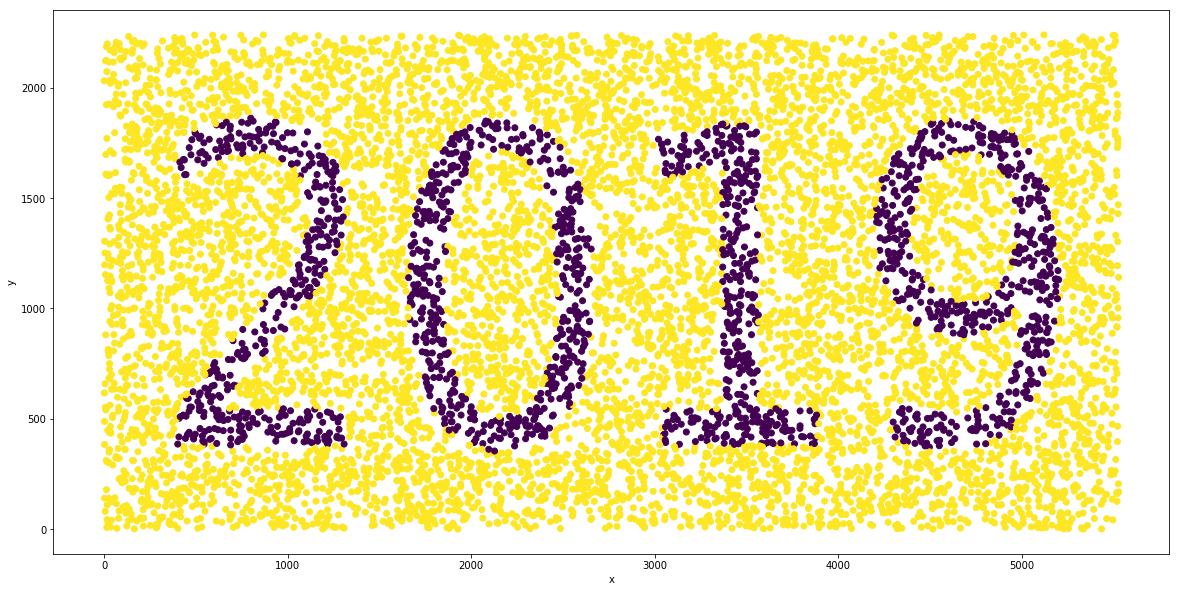

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
plt.scatter(train_x, train_y1, c=train_z)
plt.xlabel('x')
plt.ylabel('y')

## Target Import

In [0]:
target_x = df_test.drop([0],axis=1)
target_x_plot = df_test.drop([0,2],axis=1)
target_y = df_test.drop([0,1],axis=1)

## Plot target

Text(0, 0.5, 'y')

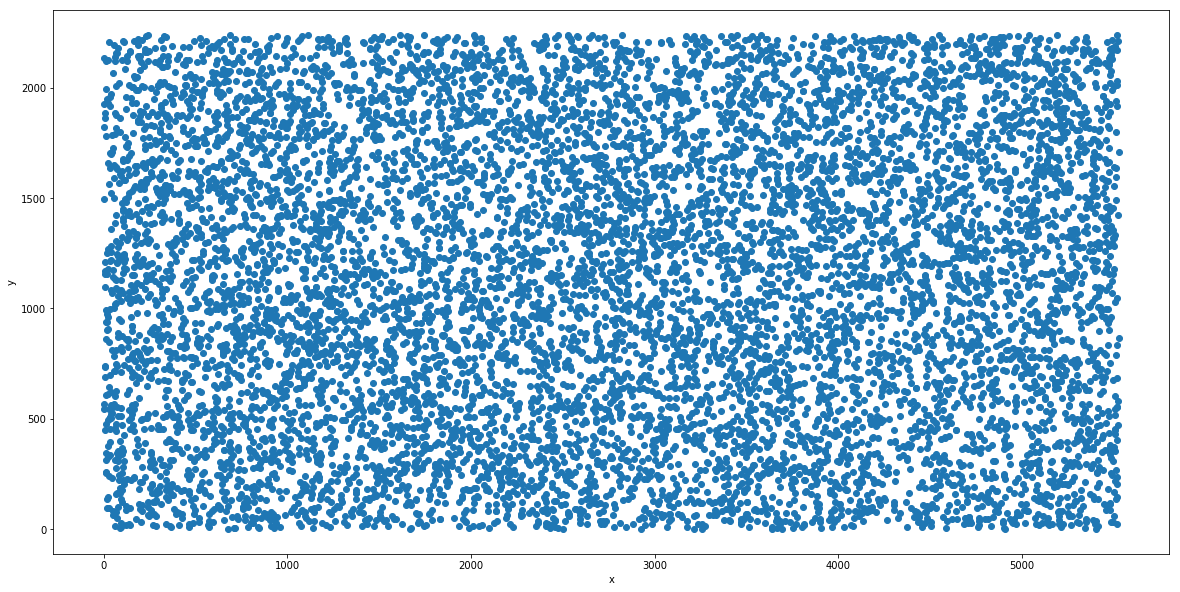

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10)) 
plt.scatter(target_x_plot, target_y)
plt.xlabel("x")
plt.ylabel("y")

# Preprocess data

In [14]:
# Standardizing the input feature
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
train_x = sc.fit_transform(train_x1)
train_y = sc.fit_transform(train_y1)
print(train_x)

[[-1.10550302 -1.04649979]
 [-1.66490212 -1.30816383]
 [-0.12113242 -0.52209696]
 ...
 [ 0.84802927 -1.04109648]
 [ 0.78158383  0.39029477]
 [-1.46892904 -0.61851809]]


## Splitting data for cross validation

In [0]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(train_x,train_z, test_size=0.3)

# Making Neural Network
Neural Network will have 2 hidden layers with ReLu activation func and 1 output layer with sigmoid activation func for binary classifier

In [16]:
import keras
from keras import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [17]:
classifier = Sequential()

# First hidden layer (c.a(layer(node #, act funct, kernel)))
classifier.add(Dense(60,activation='relu',kernel_initializer='random_normal',input_dim=2))

# Hidden layer
classifier.add(Dense(60,activation='relu',kernel_initializer='random_normal'))
classifier.add(Dense(60,activation='relu',kernel_initializer='random_normal'))
classifier.add(Dense(60,activation='relu',kernel_initializer='random_normal'))
classifier.add(Dense(60,activation='relu',kernel_initializer='random_normal'))
classifier.add(Dense(60,activation='relu',kernel_initializer='random_normal'))
classifier.add(Dense(60,activation='relu',kernel_initializer='random_normal'))
classifier.add(Dense(60,activation='relu',kernel_initializer='random_normal'))
classifier.add(Dense(60,activation='relu',kernel_initializer='random_normal'))

# Output layer
classifier.add(Dense(1,activation='sigmoid',kernel_initializer='random_normal'))

Instructions for updating:
Colocations handled automatically by placer.


To optimize this NN, Adam (Adaptive moment estimation) are used

In [0]:
# Compiling the NN Classifier
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

# Training the dataset
we will use a batch size of 10 with 5 epochs

In [20]:
# Fitting the data
classifier.fit(train_x,train_z,batch_size=25,epochs=200)

Epoch 1/200
10000/10000 [==============================] - 1s 72us/step - loss: 0.3230 - acc: 0.8443
Epoch 2/200
10000/10000 [==============================] - 1s 79us/step - loss: 0.3237 - acc: 0.8446
Epoch 3/200
10000/10000 [==============================] - 1s 79us/step - loss: 0.3184 - acc: 0.8484
Epoch 4/200
10000/10000 [==============================] - 1s 74us/step - loss: 0.3171 - acc: 0.8505
Epoch 5/200
10000/10000 [==============================] - 1s 73us/step - loss: 0.3150 - acc: 0.8513
Epoch 6/200
10000/10000 [==============================] - 1s 71us/step - loss: 0.3126 - acc: 0.8521
Epoch 7/200
10000/10000 [==============================] - 1s 71us/step - loss: 0.3110 - acc: 0.8525
Epoch 8/200
10000/10000 [==============================] - 1s 71us/step - loss: 0.3077 - acc: 0.8532
Epoch 9/200
10000/10000 [==============================] - 1s 71us/step - loss: 0.3028 - acc: 0.8568
Epoch 10/200
10000/10000 [==============================] - 1s 70us/step - loss: 0.2995 - a

In [21]:
# Evaluation for the trained model
eval_model=classifier.evaluate(x_train,y_train)
print(eval_model)

7000/7000 [==============================] - 0s 32us/step
[0.06824548933335713, 0.9702857142857143]


In [22]:
# Predict using data test
y_pred = classifier.predict(x_test)
y_pred=(y_pred>0.5)
temp_y = np.array([])

for y in y_pred:
    a = int(y[0])
    temp_y = np.append(temp_y, a)
temp_y

array([1., 1., 1., ..., 1., 1., 1.])

In [23]:
# Evaluate accuracy of the test dataset
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
print(cm)

[[ 524   29]
 [  49 2398]]


from confusion matrix above I got a total of 1524 true positive and negative out of 2000 observations data. In other words, I achieve an accuracy of **76.2%**

In [24]:
#temporer
temp = pd.DataFrame(x_test)
temp.head()

,0,1
0,-1.421848,-0.481958
1,1.551043,0.670990
2,-0.483308,-1.347303
3,-1.508433,0.383567
4,-1.207283,-0.872085


Text(0, 0.5, 'y')

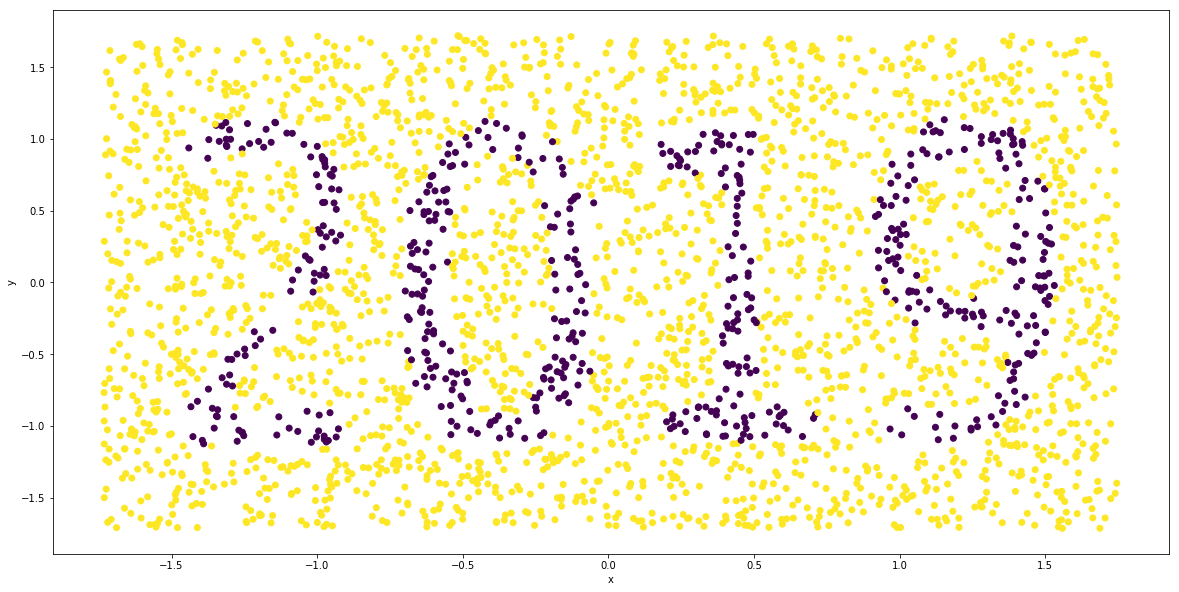

In [25]:
# plot validation
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10)) 
plt.scatter(temp[0],temp[1], c=temp_y)
plt.xlabel("x")
plt.ylabel("y")

# Predict target data

In [0]:
# Scale target_x
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_target_scale = sc.fit_transform(target_x)

In [0]:
z_test_predict = classifier.predict(X_target_scale)
z_test_predict = (z_test_predict>0.5)

In [28]:
temp_z = np.array([])

for z in z_test_predict:
    a = int(z[0])
    temp_z = np.append(temp_z, a)
temp_z

array([1., 0., 0., ..., 1., 1., 1.])

In [29]:
# Make a temporer dataframe
temp_target = pd.DataFrame(target_x)
temp_target.head()

,1,2
0,116.719304,1580.905084
1,5053.130893,727.388601
2,1943.101591,406.083902
3,4825.519309,771.889965
4,557.798150,2213.179651


In [31]:
# plot target
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10)) 
plt.scatter(temp_target[0],temp_target[1], c=temp_z)
plt.xlabel("x")
plt.ylabel("y")

KeyError: ignored

<Figure size 1440x720 with 0 Axes>

In [32]:
# Make submission dataframe
result = df_test
result['z'] = temp_z
result['z'] = result['z'].astype(int)
result.head()

,0,1,2,z
0,0,116.719304,1580.905084,1
1,1,5053.130893,727.388601,0
2,2,1943.101591,406.083902,0
3,3,4825.519309,771.889965,1
4,4,557.798150,2213.179651,1


In [33]:
# Mount GDrive
from google.colab import drive
drive.mount('drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at drive


In [0]:
# export csv
result.to_csv('18216003_submission.csv', header=None, index=True)
!cp 18216003_submission.csv drive/My\ Drive/